In [1]:
import csv

a= []

with open(r'D:\7sem\mllab\lab1.csv') as csvfile :
    for row in csv.reader(csvfile) :
        a.append(row)
        
print('The data-set is : \n\n',a)
    
print('\nThe total number of training instances are : ', len(a))
    
num_attribute = len(a[0])-1
    
print('\nThe initial hypothesis is : ')
    
hypothesis = ['0']*num_attribute

print(hypothesis)
        
for i in range(0, len(a)) :
    if a[i][num_attribute] == 'yes' :
        for j in range(0, num_attribute) :
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j] :
                hypothesis[j]=a[i][j]
            
            else :
                hypothesis[j] = '?'
        
    print('\nThe hypothesis for the training instance {} is : \n'.format(i+1), hypothesis)
        
print('\nThe maximally specific hypothesis for the training instances is : \n')
    
print(hypothesis)

The data-set is : 

 [['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'yes'], ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'yes'], ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'no'], ['Sunny', 'Warm', 'High', 'Strong', 'Cold', 'Change', 'yes']]

The total number of training instances are :  4

The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

The hypothesis for the training instance 1 is : 
 ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']

The hypothesis for the training instance 2 is : 
 ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']

The hypothesis for the training instance 3 is : 
 ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']

The hypothesis for the training instance 4 is : 
 ['Sunny', 'Warm', '?', 'Strong', '?', '?']

The maximally specific hypothesis for the training instances is : 

['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [10]:
import pandas as pd
data = pd.read_csv(r'D:\7sem\mllab\lab2.csv')

concepts = data.values[:, :-1]
target = data.values[:, -1]

def learn(concepts, target) :
    specific_h = concepts[0].copy()
    
    general_h = [ [ '?' for i in range(len(specific_h))] for i in range(len(specific_h))]
    
    i = 0
    
    for h in concepts :
        if target[i] == 'yes' :
            for x in range(len(specific_h)) :
                if h[x] != specific_h[x] :
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
                    
        elif target[i] == 'no' :
            for x in range(len(specific_h)) :
                if h[x] != specific_h[x] :
                    general_h[x][x] = specific_h[x]
                    
                else :
                    general_h[x][x] = '?'
                
        i += 1
        
    indices = [i for i, val in enumerate(general_h) if val == [ '?' for i in range(len(specific_h))]]
    
    for i in indices :
        general_h.remove(['?' for i in range(len(specific_h))])
        
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print('Final - Specific Hypothesis :\n', s_final)
print('Final - General Hypothesis :\n', g_final)

Final - Specific Hypothesis :
 ['Sunny' 'Warm' '?' 'Strong' '?' '?']
Final - General Hypothesis :
 [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


In [3]:
import math
import csv

def load_csv(filename):
    lines=csv.reader(open(filename,'r'));
    dataset = list(lines)   
    headers = dataset.pop(0)
    return dataset,headers

class Node:
    def __init__(self,attribute):   
        self.attribute=attribute
        self.children=[]
        self.answer=""  
      
    
def subtables(data,col,delete):
    dic={}
    coldata=[row[col] for row in data] #one by one column values are stored in coldata
    attr=list(set(coldata)) #duplicate values are removed and only unique values are stored in attr 
    counts=[0]*len(attr) #all unique values are set to 0. If values are overcast,rainy,sunny counts will be [0,0,0]
    r=len(data) #length is 14 for original table and length is 5 for 2 subtables
    c=len(data[0])  # length is 5 for original table and 4 for the two subtables
    
    for x in range(len(attr)): 
        for y in range(r):
            if data[y][col]==attr[x]:   #counting how many sunny, rainy, overcast  
                counts[x]+=1 
    for x in range(len(attr)):
        dic[attr[x]]=[[0 for i in range(c)] for j in range(counts[x])]
        pos=0
        for y in range(r): 
            if data[y][col]==attr[x]:                   #deleting outlook column for subtable 2
                if delete:
                    del data[y][col]
                dic[attr[x]][pos]=data[y]
                pos+=1
    return attr,dic
    
def entropy(S):
    attr=list(set(S))
    if len(attr)==1:  
        return 0    #entropy is 0 when there are only positive or only negative instances
    counts=[0,0] 
    for i in range(2):  #0,1
        counts[i]=sum([1 for x in S if attr[i]==x])/(len(S)*1.0)  #counting the number of no instances and yes instances  
    sums=0
    for cnt in counts:
        sums+=-1*cnt*math.log(cnt,2)
    return sums

def compute_gain(data,col):
    attr,dic = subtables(data,col,delete=False)    
    total_size=len(data)  #14
    entropies=[0]*len(attr) 
    ratio=[0]*len(attr)    
    total_entropy=entropy([row[-1] for row in data])   #Entropy(S) 
    for x in range(len(attr)): #0,1,2
        ratio[x]=len(dic[attr[x]])/(total_size*1.0)    #number of attribute values/total instances
        entropies[x]=entropy([row[-1] for row in dic[attr[x]]])   #calculate entropy of individual values (entropy(sv))
        total_entropy=total_entropy-ratio[x]*entropies[x]
    return total_entropy

def build_tree(data,features):
    lastcol=[row[-1] for row in data] 
    if(len(set(lastcol)))==1: #leaf node
        node=Node("")   #passing an empty string since there are no further children
        node.answer=lastcol[0]  #leaf node values
        return node   
    n=len(data[0])-1   #number of attributes = 5-1=4
    gains=[0]*n
    for col in range(n):
        gains[col]=compute_gain(data,col)    #compute gain for evry attribute
    split=gains.index(max(gains))   # Position of maximum gain is stored in split
    node=Node(features[split])   #creating a node with 3 members
    
    fea = features[:split]+features[split+1:]
    attr,dic=subtables(data,split,delete=True)

    for x in range(len(attr)):
        child=build_tree(dic[attr[x]],fea)    #build tree for each child attribute
        node.children.append((attr[x],child))
    return node

def print_tree(node,level):
    if node.answer!="":
        print("  "*level,node.answer)
        return
    print("  "*level,node.attribute)
    for value,n in node.children:
        print("  "*(level+1),value)
        print_tree(n,level+2)

def classify(node1,xtest,features):    #classifies a new test instance,xtest 
    if node1.answer!="":
        print(node1.answer)
        return
    pos=features.index(node1.attribute)
    for value, node1 in node1.children:
        if xtest[pos]==value:
            classify(node1,xtest,features)
            
            
dataset,features=load_csv(r"D:\7sem\mllab\trainingdatasetlab3.csv")
node1=build_tree(dataset,features)
print("The decision tree for the dataset using ID3 algorithm is")
print_tree(node1,0)
testdata,features=load_csv(r'D:\7sem\mllab\testdatasetlab3.csv')
for xtest in testdata:
    print("The test instance:",xtest)
    print("The label for test instance:",end="   ")
    classify(node1,xtest,features)

The decision tree for the dataset using ID3 algorithm is
 Outlook
   Rain
     Wind
       Strong
         No
       Weak
         Yes
   Overcast
     Yes
   Sunny
     Humidity
       Normal
         Yes
       High
         No
The test instance: ['Rain', 'Cool', 'Normal', 'Strong']
The label for test instance:   No
The test instance: ['Sunny', 'Mild', 'Normal', 'Strong']
The label for test instance:   Yes
The test instance: ['Overcast', 'Mild', 'Normal', 'Strong']
The label for test instance:   Yes


In [5]:
import numpy as np
x = np.array(([2,9],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)
x = x/np.amax(x,axis=0)
y=y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def der_sigmoid(x):
    return x*(1-x)

e = 5000
learn_rate = 0.1
inLayer_neurons = 2
hiddenLayer_neurons = 3
out_neurons = 1

wh = np.random.uniform(size=(inLayer_neurons,hiddenLayer_neurons))
bh = np.random.uniform(size=(1,hiddenLayer_neurons))
wo = np.random.uniform(size=(hiddenLayer_neurons,out_neurons))
bo = np.random.uniform(size=(1,out_neurons))

for i in range(e):
    net_h = np.dot(x,wh)+bh
    sigma = sigmoid(net_h)
    net_o = np.dot(sigma,wo)+bo
    output =sigmoid(net_o)
    deltaK = der_sigmoid(output)*(y-output)
    deltaH = der_sigmoid(sigma)* np.dot(wo.T,deltaK)
    wo =wo + np.dot(sigma,deltaK) * learn_rate
    wh = wh+ np.dot(x.T,deltaH) * learn_rate


print("Input:\n" +str(x))
print("Actual Output:\n" +str(y))
print("Predicted Output:\n" ,output)

Input:
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output:
[[0.92]
 [0.86]
 [0.89]]
Predicted Output:
 [[0.89762516]
 [0.87654049]
 [0.89404919]]


In [3]:
import pandas as pd
msg=pd.read_csv(r'D:\7sem\mllab\lab6.csv', names=['message','label'])
print("Dimension of Dataset:",msg.shape)
msg['label']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.label

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)
print("Total number of training data:",ytrain.shape)
print("Total number of testing data:",ytest.shape)

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
Xtrain_dm=cv.fit_transform(Xtrain)
# Xtrain_dm=cv.fit_transform(xtrain)
Xtest_dm=cv.transform(Xtest)
print("The words or tokens in text document:",cv.get_feature_names())

# df=pd.DataFrame(Xtrain_dm.toarray(),columns=cv.get_feature_names())

from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB().fit(Xtrain_dm,ytrain)
pred=clf.predict(Xtest_dm)

for doc,p in zip(Xtest,pred):
    p='pos' if p==1 else 'neg'
    print("%s->%s" %(doc,p))
    
from sklearn import metrics

print('Accuracy:',metrics.accuracy_score(ytest,pred))
print('Confusion Matrix:\n',metrics.confusion_matrix(ytest,pred))
print('Recall:',metrics.recall_score(ytest,pred))
print('Precision:',metrics.precision_score(ytest,pred))

Dimension of Dataset: (18, 2)
Total number of training data: (13,)
Total number of testing data: (5,)
The words or tokens in text document: ['about', 'am', 'an', 'and', 'awesome', 'bad', 'beers', 'best', 'boss', 'dance', 'do', 'enemy', 'feel', 'good', 'he', 'horrible', 'house', 'is', 'juice', 'like', 'locality', 'love', 'my', 'not', 'of', 'place', 'restaurant', 'sick', 'stay', 'stuff', 'sworn', 'taste', 'that', 'the', 'these', 'this', 'tired', 'to', 'today', 'very', 'view', 'went', 'what', 'work']
This is an amazing place->pos
What a great holiday->pos
I can't deal with this->neg
I love this sandwich->pos
We will have good fun tomorrow->pos
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 4]]
Recall: 1.0
Precision: 1.0


In [6]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
dataset = load_iris()

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(dataset["data"],dataset["target"],test_size=0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
c = KNeighborsClassifier(n_neighbors= 5)
c.fit(x_train,y_train)

for i in range(len(x_test)):
    x=x_test[i]
    prediction = c.predict([x])
    print("TARGET =",y_test[i],"PREDICTED =",prediction,dataset["target_names"][prediction])
print("Acuracy" ,c.score(x_test,y_test))

TARGET = 0 PREDICTED = [0] ['setosa']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 0 PREDICTED = [0] ['setosa']
TARGET = 2 PREDICTED = [2] ['virginica']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 2 PREDICTED = [2] ['virginica']
TARGET = 0 PREDICTED = [0] ['setosa']
TARGET = 0 PREDICTED = [0] ['setosa']
TARGET = 2 PREDICTED = [2] ['virginica']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 0 PREDICTED = [0] ['setosa']
TARGET = 2 PREDICTED = [2] ['virginica']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 0 PREDICTED = [0] ['setosa']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 0 PREDICTED = [0] ['setosa']
TARGET = 0 PREDICTED = [0] ['setosa']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 1 PREDICTED = [1] ['versicolor']
TARGET = 0 PREDICTED = [0] ['setosa']
TARGET = 2 PREDICTED = [2] ['vir

In [1]:
import pandas as pd
data = pd.read_csv(r'D:\7sem\mllab\lab7.csv')
heart_disease = pd.DataFrame(data)

from pgmpy.models import BayesianModel
model = BayesianModel([('age','trestbps'),('age','fbs'),('sex','trestbps'),('exang','trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),('heartdisease','restecg'),('heartdisease','thalach'),('heartdisease','chol')])
model.fit(data)

from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

q = infer.query( variables = ['heartdisease'], evidence = {'age' : 28}, joint = False)
print(q['heartdisease'])

q = infer.query( variables = ['heartdisease'], evidence = {'chol' : 100}, joint = False)
print(q['heartdisease'])




D:\anaconda\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:518: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
Eliminating: trestbps:   0%|                                                                     | 0/7 [00:00<?, ?it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.5936 |
+-----------------+---------------------+
| heartdisease(1) |              0.1661 |
+-----------------+---------------------+
| heartdisease(2) |              0.0904 |
+-----------------+---------------------+
| heartdisease(3) |              0.1103 |
+-----------------+---------------------+
| heartdisease(4) |              0.0395 |
+-----------------+---------------------+



Finding Elimination Order: : 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 73.68it/s]

Eliminating: restecg: 100%|██████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 21.70it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              1.0000 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.0000 |
+-----------------+---------------------+
| heartdisease(3) |              0.0000 |
+-----------------+---------------------+
| heartdisease(4) |              0.0000 |
+-----------------+---------------------+


Text(0.5, 1.0, 'Gaussian Mixture Classification')

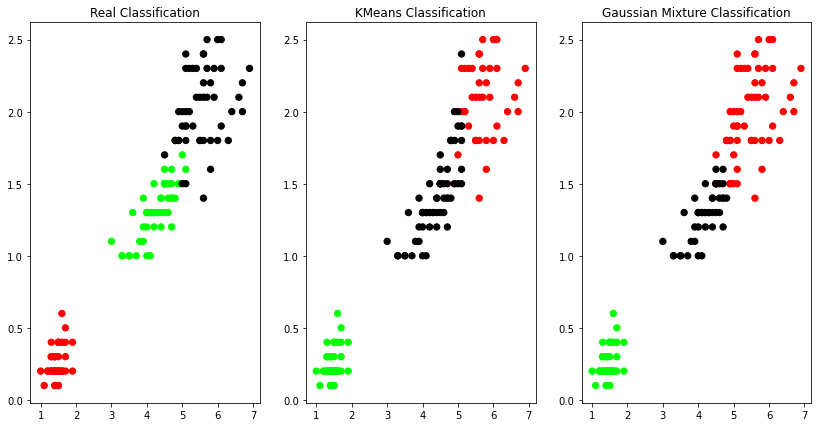

In [8]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
dataset = load_iris()

x = pd.DataFrame(dataset.data)
y = pd.DataFrame(dataset.target)
y.columns = ["Targets"]
x.columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]

import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
colormap = np.array(["red","lime","black"])
plt.subplot(1, 3, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y.Targets], s = 40)
plt.title("Real Classification")

from sklearn.cluster import KMeans
plt.subplot(1, 3, 2)
model = KMeans(n_clusters = 3)
model.fit(x)
predy = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[predy], s = 40)
plt.title("KMeans Classification")

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 3)
gm.fit(x)
predy_gm = gm.predict(x)
plt.subplot(1, 3, 3)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[predy_gm], s = 40)
plt.title("Gaussian Mixture Classification")


In [2]:
import pandas as pd

data = pd.read_csv(r'D:\7sem\mllab\lab5.csv')

attribute_names = ["num_preg", "glucose_conc", "diastolic_bp", "thickness", "insulin", "bmi", "diab_pred", "age"]
target_names = ["diabetes"]

x = data[attribute_names].values
y = data[target_names].values

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33)
print("Total number of training data = ", ytrain.shape)
print("Total number of testing data = ", ytest.shape)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(xtrain, ytrain)
predicted = clf.predict(xtest)

from sklearn import metrics
print("ACCURACY : ", metrics.accuracy_score(ytest, predicted))

# print("Target Value : ", y)
# print("Predicted Value : ", predicted)

Total number of training data =  (514, 1)
Total number of testing data =  (254, 1)
ACCURACY :  0.7677165354330708


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


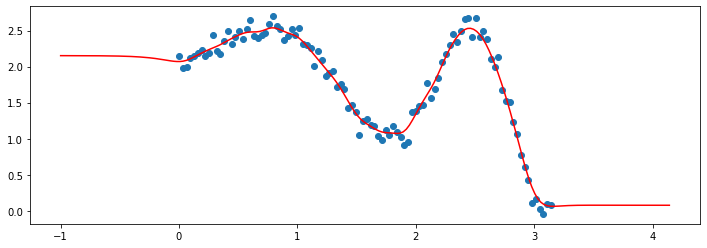

In [21]:
import numpy as np
import matplotlib.pylab as plt
from sklego.linear_model import LowessRegression

n = 100
xs = np.linspace(0, np.pi, n)
ys = 1 + np.sin(xs) + np.cos(xs**2)+np.random.normal(0, 0.1, n)

mod = LowessRegression(sigma = 0.01, span = 0.5).fit(xs.reshape(-1, 1), ys)

xs_new = np.linspace(-1, np.pi + 1, n*2)
preds = mod.predict(xs_new.reshape(-1, 1))

plt.figure(figsize = (12, 4))
plt.scatter(xs, ys)
plt.plot(xs_new, preds, color = 'red')

In [1]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook
def local_regression(x0, X, Y, tau):# add bias term
    x0 = np.r_[1, x0] # Add one to avoid the loss ininformation
    X = np.c_[np.ones(len(X)), X]
    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau) # XTranspose * W
    beta = np.linalg.pinv(xw @ X) @ xw @ Y #@ Matrix Multiplication or Dot Product
    # predict value
    return x0 @ beta # @ Matrix Multiplication or Dot Product for prediction
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau *tau))
# Weight or Radial Kernal Bias Function
n = 1000
# generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y:\n",Y[1:10])
# jitter X
X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])
domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])
def plot_lwr(tau):
    # prediction through regression
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plot = figure(plot_width=400, plot_height=400)
    plot.title.text='tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot
show(gridplot([
[plot_lwr(10.), plot_lwr(1.)],
[plot_lwr(0.1), plot_lwr(0.01)]]))

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y:
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-2.91180384 -2.84315848 -2.86232492 -3.04924492 -2.9645304  -2.89725578
 -2.73746644 -2.90170757 -3.23776321]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


In [7]:
import pandas as pd 
df_tennis = pd.read_csv(r'D:\7sem\mllab\trainingdatasetlab3.csv')
attribute_names = list(df_tennis.columns)
attribute_names.remove('PlayTennis')
def entropy_of_list(lst):
    from collections import Counter
    count = Counter(x for x in lst)
    num_instances = len(lst)*1
    probs = [x/num_instances for x in count.values()]
    return entropy(probs)
def entropy(probs):
    import math
    return sum([-prob*math.log(prob,2) for prob in probs])
total_entropy = entropy_of_list(df_tennis['PlayTennis'])
def information_gain(df,split_attribute_name,target_attribute_name,trace=0):
    df_split = df.groupby(split_attribute_name)
    nobs  = len(df.index) * 1
    df_agg_ent = df_split.agg({target_attribute_name:[entropy_of_list,lambda x:len(x)/nobs]})
    df_agg_ent.columns  = ['Entropy','propobservations']
    new_entropy = sum(df_agg_ent['Entropy'] * df_agg_ent['propobservations'])
    old_entropy = entropy_of_list(df[target_attribute_name])
    print(split_attribute_name,'IG:',old_entropy-new_entropy)
    return old_entropy - new_entropy
def id3(df,target_attribute_name,attribute_names,default_class=None):
    from collections import Counter
    count = Counter(x for x in df[target_attribute_name])
    if(len(count)==1):
        return next(iter(count))
    elif df.empty or (not attribute_names):
        return default_class
    else:
        default_class = max(count.keys())
        gain = [
            information_gain(df,attr,target_attribute_name) for attr in attribute_names
        ]
        
        print()
        
        index_of_max = gain.index(max(gain))
        best_attr = attribute_names[index_of_max]
        
        tree = {best_attr:{}}
        
        remaining_attribute_names = [i for i in attribute_names if i != best_attr]
        
        for attr_val,data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,target_attribute_name,remaining_attribute_names,default_class)
            tree[best_attr][attr_val] = subtree
            
        return tree
from pprint import pprint
tree = id3(df_tennis,'PlayTennis',attribute_names)
print("Resultant Decision Tree is :")
pprint(tree)

Outlook IG: 0.2467498197744391
Temperature IG: 0.029222565658954647
Humidity IG: 0.15183550136234136
Wind IG: 0.04812703040826927

Temperature IG: 0.01997309402197489
Humidity IG: 0.01997309402197489
Wind IG: 0.9709505944546686

Temperature IG: 0.5709505944546686
Humidity IG: 0.9709505944546686
Wind IG: 0.01997309402197489

Resultant Decision Tree is :
{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}
